In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [2]:
df = pd.read_csv('../data/cleaned_data.csv')
df.dtypes

id                   int64
title               object
year               float64
author_name         object
author_org          object
author_id           object
n_citation         float64
doc_type            object
reference_count    float64
references          object
venue_id           float64
venue_name          object
venue_type          object
doi                 object
keyword             object
volume             float64
issue              float64
publisher           object
weight              object
indexed_keyword     object
inverted_index      object
dtype: object

# Hypothesis 3:
> Older papers have accumulated more citations over time than newer papers.

- Null Hypothesis (H₀): There is no correlation between publication year and the number of citations.
- Alternative Hypothesis (H₁): There is a negative correlation between publication year and the number of citations.

### We will be using the **Spearman Correlation test** as it measure monotonic relationships

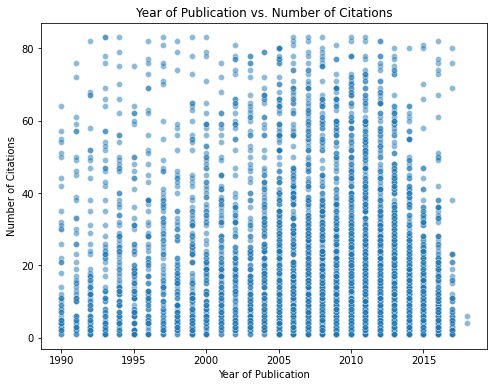

Spearman Correlation Coefficient: -0.1734
P-value: 6.9893e-39
Reject the null hypothesis: Older papers have more citations.


In [3]:
# Extract necessary columns and drop missing values
df = df[['year', 'n_citation']].dropna()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='year', y='n_citation', alpha=0.5)
plt.title('Year of Publication vs. Number of Citations')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Citations')
plt.show()

# Calculate Spearman correlation
corr_coef, p_value = spearmanr(df['year'], df['n_citation'])

print(f"Spearman Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05
# Interpret the results
if p_value < alpha:
    if corr_coef < 0:
        print("Reject the null hypothesis: Older papers have more citations.")
    else:
        print("Reject the null hypothesis: Newer papers have more citations.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between year and citations.")

> Negative correlation => older papers tend to have more citations